In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from numpy.random import randn
#import stats library from numpy
from scipy import stats
from scipy.stats import chi2_contingency
#these are the ploting moduls and libraries we will use
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#command so that plots appear in iPython Notebook
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.preprocessing import MinMaxScaler

We have a data about mobile phone users and their behavior. We want to explore behavioral patterns of users ralated to different aspects of mobile phone usage.

In [3]:
mobile=pd.read_csv('user_behavior_dataset.csv')

In [4]:
mobile.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [5]:
mobile.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [6]:
mobile.set_index('User ID').head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
User ID,,,,,,,,,,
1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


Which of the two Operating System is dominant, more in use? Android.

In [7]:
mobile['Operating System'].value_counts()

Operating System
Android    554
iOS        146
Name: count, dtype: int64

Does gender affect the choice of operating system?

Text(0, 0.5, 'Count')

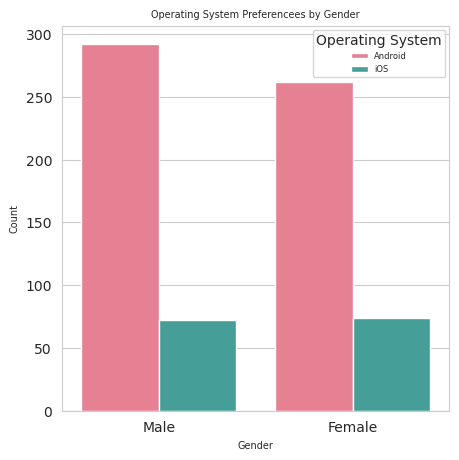

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(data=mobile, x='Gender', hue='Operating System',palette='husl')
plt.legend(title='Operating System',fontsize=6)
plt.title('Operating System Preferencees by Gender',fontsize=7)
plt.xlabel('Gender', fontsize=7)
plt.ylabel('Count',fontsize=7)

In [9]:
chi_table = pd.crosstab(mobile['Gender'], mobile['Operating System'])

In [10]:
chi2,p,dof,expected = chi2_contingency(chi_table)

In [11]:
print('Chi-Square Statistic:', chi2)
print('p-value:', p)
print('Degrees of Freedom:', dof)
print('Expected Frequencies:\n', expected)

Chi-Square Statistic: 0.4055487345600358
p-value: 0.524237482456694
Degrees of Freedom: 1
Expected Frequencies:
 [[265.92  70.08]
 [288.08  75.92]]


Since the p-value (0.524) is greater than the significance level (0.05), the null hypothesis can't be rejected. This means there is no significant association between gender and the choice of operating system based on data analyzed.

In [12]:
mobile[mobile['Operating System'] == 'iOS'].groupby('Gender').count()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
Gender,,,,,,,,,,
Female,74,74,74,74,74,74,74,74,74,74
Male,72,72,72,72,72,72,72,72,72,72


In [13]:
pd.crosstab(mobile['Operating System'], mobile['Gender'], margins=True)

Gender,Female,Male,All
Operating System,,,
Android,262,292,554
iOS,74,72,146
All,336,364,700


We would like to see is there any significant differenece between female-male how many hours/day they spend on screen? 

In [14]:
mobile_gender_hours=mobile.groupby('Gender')['Screen On Time (hours/day)'].sum()
mobile_gender_hours


Gender
Female    1767.8
Male      1923.1
Name: Screen On Time (hours/day), dtype: float64

In [16]:
chi_table = pd.crosstab(mobile['Gender'], mobile['Screen On Time (hours/day)'])
chi2,p,dof,expected = chi2_contingency(chi_table)


In [19]:
print('Chi-Square Statistic:', chi2)
print('p-value:', p)
print('Degrees of Freedom:', dof)


Chi-Square Statistic: 100.53153885874474
p-value: 0.6574769476089769
Degrees of Freedom: 107


We see a very high value of p for Chi-Square Statistic and we can conclude that there is no difference between screen on time across genders.

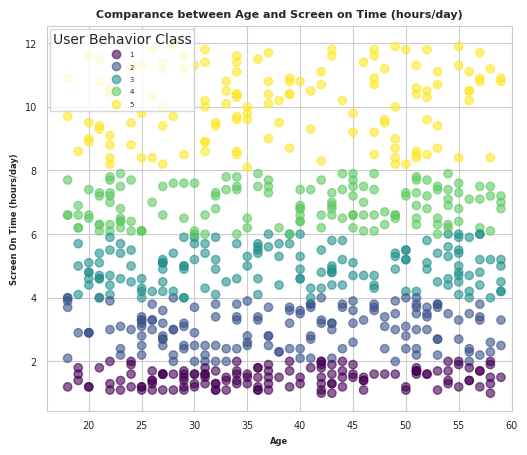

In [20]:
plt.figure(figsize=(6,5))
scatter=plt.scatter(mobile['Age'],
                    mobile['Screen On Time (hours/day)'],
                    alpha=0.6,
           c=mobile['User Behavior Class'],
           cmap='viridis')
plt.legend(*scatter.legend_elements(),loc='upper left',title='User Behavior Class',fontsize=5)
plt.xlim(16,60)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Age', weight='bold',fontsize=6)	
plt.ylabel('Screen On Time (hours/day)',weight='bold',fontsize=6)
plt.title('Comparance between Age and Screen on Time (hours/day)',fontsize=8,weight='bold')
plt.show()

We see that age and time spent on the phone are not related, that is, there are people in all age groups who spend a lot of time on the phone.
We want to check if the number of apps installed is related to the number of hours spent on the phone.

In [ ]:
plt.figure(figsize=(6,5))
scatter=plt.scatter(mobile['Screen On Time (hours/day)'],
                    mobile['Number of Apps Installed'],
            alpha=0.6,
           c=mobile['User Behavior Class'],
           cmap='viridis')
plt.legend(*scatter.legend_elements(),loc='upper left',title='User Behavior Class',fontsize=5)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Screen On Time (hours/day)', weight='bold',fontsize=6)	
plt.ylabel('Number of Apps Installed',weight='bold',fontsize=6)
plt.title('Comparance between Number of Apps installed and Screen on Time (hours/day)',fontsize=8,weight='bold')
plt.show()

In order to standardize numerical variables, we first want to check the distribution.

In [21]:
mobile.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [22]:
mobile_for_plot = mobile[['App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age']]

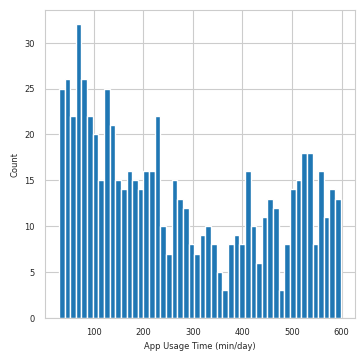

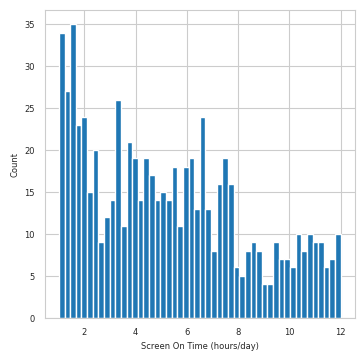

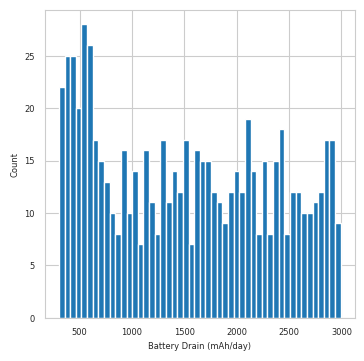

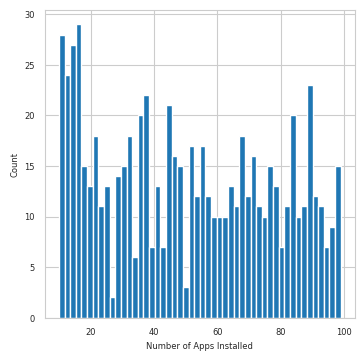

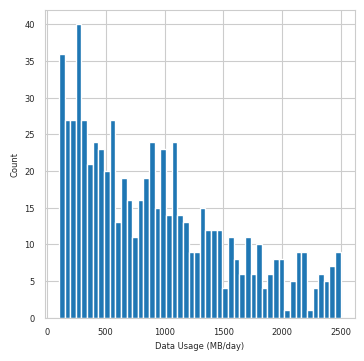

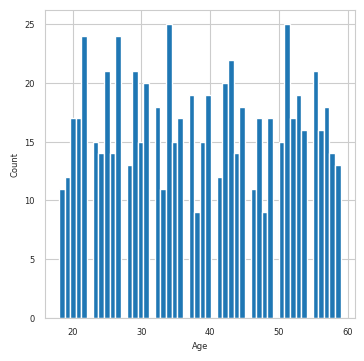

In [23]:
for col in mobile_for_plot.columns:
    plt.figure(figsize =(4,4))
    plt.hist(mobile[col], bins = 50)
    plt.xlabel(f'{col}',fontsize=6)
    plt.ylabel('Count',fontsize=6)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.show()

We see that there is no normal distribution, so we will apply the min-max scaler to standardize the variables.

In [24]:
columns_to_scale = ['App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age']

In [25]:
scaler = MinMaxScaler()

In [26]:
mobile_scaled = scaler.fit_transform(mobile[columns_to_scale])

In [27]:
mobile_scaled = pd.DataFrame(mobile_scaled, columns = columns_to_scale)

In [28]:
mobile_scaled.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
0,0.639085,0.490909,0.583426,0.640449,0.425887,0.536585
1,0.419014,0.336364,0.382386,0.359551,0.351566,0.707317
2,0.218310,0.272727,0.170569,0.247191,0.091858,0.585366
3,0.367958,0.345455,0.510591,0.516854,0.321086,0.048780
4,0.276408,0.300000,0.395764,0.539326,0.369937,0.317073


We see very high correlations between all aspects of high mobile usage. And we see that age is not correlated with mobile phone usage meaning that phone usage is not related to particular age.

In [29]:
correlation_matrix_apps_hours = mobile_scaled.corr()

<Axes: >

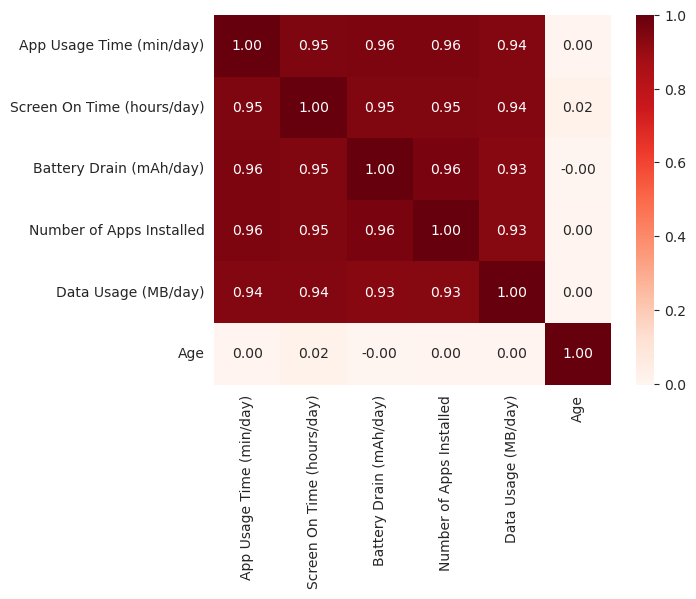

In [30]:
sns.heatmap(correlation_matrix_apps_hours, annot=True, fmt=".2f", cmap='Reds')

I played a litle bit with word cloud to see what type of the phone is most frequent. Iphone and Xiaomi are the most used ones.

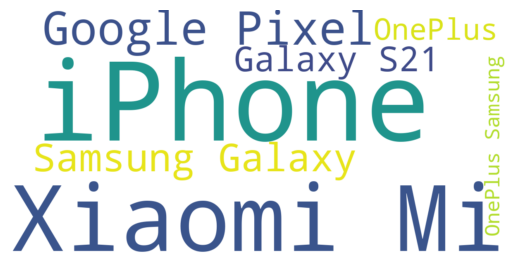

In [31]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1200, height = 600,background_color = 'white').generate(' '.join(mobile['Device Model']))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [36]:
mobile['Device Model'].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

I wanted to ched if i can cluster the users based on their behaviour and other caracteristics in the way that is different than the given behavior class. I also wanted to check the optimal number cluster with elbow method. 

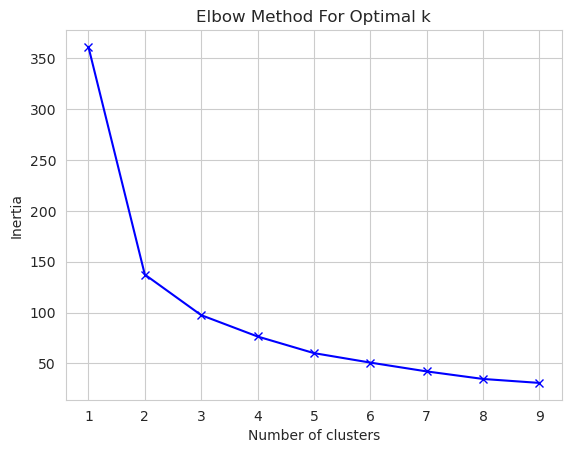

In [37]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(mobile_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method result
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

I will try solution with 3 clusters. When we plot a data we see that data are probably artificialy sampled from some lager data set, and we see that 3 cluster solution just merged given closest behaviour paterns in related clusters.

In [33]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
mobile['Cluster'] = kmeans.fit_predict(mobile_scaled)

# Display the clustered DataFrame
mobile.head()

/home/mina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Cluster
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,1
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,1
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,0
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,1
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,1


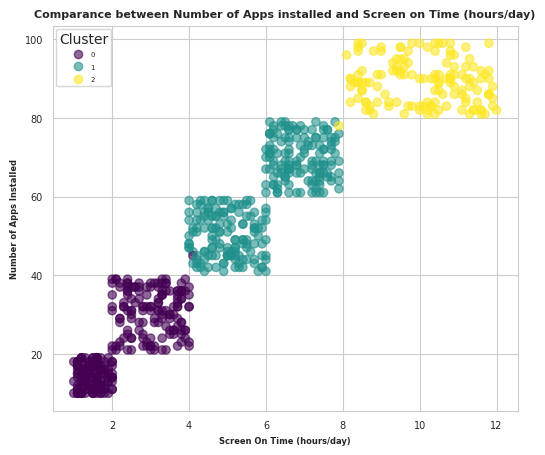

In [34]:
plt.figure(figsize=(6,5))
scatter=plt.scatter(mobile['Screen On Time (hours/day)'],
                    mobile['Number of Apps Installed'],
            alpha=0.6,
           c=mobile['Cluster'],
           cmap='viridis')
plt.legend(*scatter.legend_elements(),loc='upper left',title='Cluster',fontsize=5)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Screen On Time (hours/day)', weight='bold',fontsize=6)	
plt.ylabel('Number of Apps Installed',weight='bold',fontsize=6)
plt.title('Comparance between Number of Apps installed and Screen on Time (hours/day)',fontsize=8,weight='bold')
plt.show()